# Exploratory Data Analysis of Titanic Data
### Exploring survival

### 1. Introduction

The Titanic challenge on Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing them by their age, their sex, or their passenger class on the boat.

I have been playing around with the data and this notebook details the exploratory data analysis(EDA)steps.
* Data extraction : I will load the dataset and have a first look at it.
* Data cleaning : I will fill in missing values.
* Plotting : I will create charts (bar,histogram and scatter) and use them to spot correlations of the data.

The main libraries I used are:
* Numpy for multidimensional array computing
* Pandas for data manipulation
* Matplotlib and seaborn for data visualization

Resources:
https://www.kaggle.com/c/titanic

In [127]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

### 2. Import the data and do descriptive analysis on it

We are reading the csv file directly using pandas. 

In [128]:
filename = 'train.csv'
sample = pd.read_csv(filename)
print (type(sample))

<class 'pandas.core.frame.DataFrame'>


### 2.1 Basic commands
We can get a feel of the data by using commands such as:
* shape
* dtypes
* head() 
* describe() 
etc.

In [129]:
sample.shape

(891, 12)

In [130]:
sample.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [131]:
sample.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
sample.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Variable Descriptions:**
* survival:        Survival (0 = No; 1 = Yes)                
* pclass:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
  Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
* sibsp:           Number of Siblings/Spouses Aboard 
* parch:           Number of Parents/Children Aboard

* ticket:          Ticket Number
* fare:            Passenger Fare
* cabin:           Cabin
* embarked:        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Note:
The survival is the target variable with '1' indicating that the person survived and '0' indicating that the person died.  

Also, we see that there are lots of missing values in 'age'. In fact, there are 891-714 = 177 missing values.

### 2.1 Switching column names to lower case

I see that the names have upper and lower cases eg ('SibSp'). I want to switch to all lower case. This is just so later on it is easier to access them by names later on. These steps become very important when we are dealing with large number of columns.

In [133]:
print (sample.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [134]:
sample.columns=map(str.lower,sample.columns)
print (sample.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


### 2.2 Plotting  (Histograms)

I am making histograms to check the dristubution of data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121732f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e04eef0>]], dtype=object)

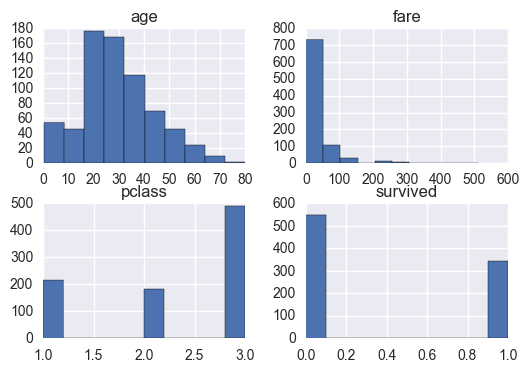

In [135]:
sample[['survived', 'pclass','age','fare']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e068d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126ba2f60>]], dtype=object)

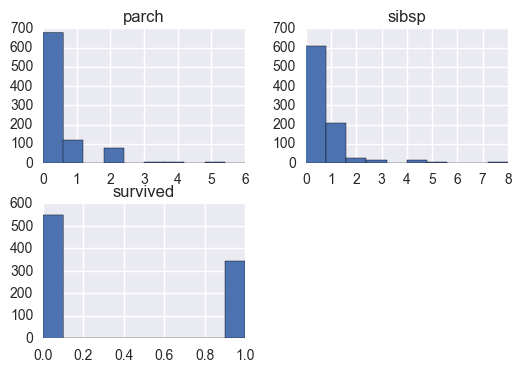

In [136]:
sample[['sibsp','parch','survived' ]].hist()

### 3. Basic questions:

Now we can start formulating questions about the data.

* How many people survived?
* How many men survived vs women?
* Can we corelate fare class and the chance of survival?
* Was age a factor in survival? 

We will try and answer all these questions. But, first we start by just counting the number of survivors. 

### 3.1 Counting number of survivors 

There are different ways of doing this and I have shown three different ways below:
1. Counting using count() and sum()
2. Using histogram from numpy package
3. Using value_counts()

In [137]:
# 1. Counting using count() and sum()
num_psgr     = sample['survived'].count() # This gives us the number of elements in this column
num_survived = sample['survived'].sum()   # This works as survived is indicated by '1'
num_died     = num_psgr-num_survived
print ('Number of passengers:', num_psgr) 
print ('Number of survivors:', num_survived)  
print ('Number of dead passengers:', num_died) 

Number of passengers: 891
Number of survivors: 342
Number of dead passengers: 549


In [138]:
# 2. Using histogram of numpy package

hist,bin_edges = np.histogram(sample[['survived']],bins=2)

num_psgr     = hist.sum()
num_survived = hist[1]  
num_died     = hist[0]
print ('Number of passengers:', num_psgr) 
print ('Number of survivors:', num_survived)  
print ('Number of dead passengers:', num_died) 

Number of passengers: 891
Number of survivors: 342
Number of dead passengers: 549


In [139]:
# Using value_counts()
num_psgr     = sample['survived'].value_counts().sum()
num_survived = sample['survived'].value_counts()[0]  
num_died     = sample['survived'].value_counts()[1]
print ('Number of passengers:', num_psgr) 
print ('Number of survivors:', num_survived)  
print ('Number of dead passengers:', num_died) 

Number of passengers: 891
Number of survivors: 549
Number of dead passengers: 342


### 3.2 Did women have a greater chance of survival?

We used a boolean expression to seperate the male and female survivors:

```
sample['sex'] == 'male'
sample['sex'] == 'female'```

In [140]:
c_men=sample [sample['sex'] == 'male'].count()['passengerid']
c_women=sample[sample['sex'] == 'female'].count()['passengerid']
print ("Number of male passengers {} and number of female passengers {}".format(c_men,c_women))

Number of male passengers 577 and number of female passengers 314


In [141]:
num_survivors = sample[sample['survived']==1]['sex'].value_counts()
print("Out of total {} survivors, the number of female/male were:\n{}".format(num_survivors.sum(),num_survivors))
num_dead = sample[sample['survived']==0]['sex'].value_counts()
print("\nOut of total {} dead, the number of female/male were:\n{}".format(num_dead.sum(),num_dead))

Out of total 342 survivors, the number of female/male were:
female    233
male      109
Name: sex, dtype: int64

Out of total 549 dead, the number of female/male were:
male      468
female     81
Name: sex, dtype: int64


### Summary: 

|  Sex\Status |   Survived|Dead   | Total  |   
|---|---|---|---|---|
| Male  |  109 |468   | 577  |   
| Female  | 233  |81   | 314  |   
|  Total |  342 |  549 |   | 

* Number of Survivors: men 109 and women 233 
* Number of Dead     : men 468 and women 81 
* Total number of passengers: men 577 and women 314

These numbers gives us an idea, however we would like to make charts as it much easier to understand that way.

### 3.3 Did women have a greater chance of survival? (graphs)

Let's correlate the survival with gender.

### Method 1: Make manual arrays which is doable in this case as it is a small array.

df         Dead  Survived
Male     468       109
Female   233        81


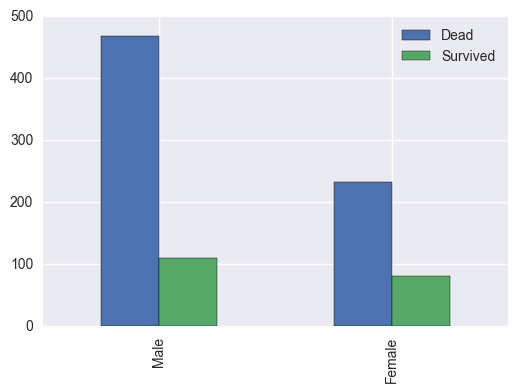

In [142]:
Male_array=[468,109] #0,1
Female_array=[233,81] #0,1
df = pd.DataFrame([Male_array,Female_array])
df.index = ['Male','Female']
df.columns = ['Dead', 'Survived']
print("df",df)
df.plot(kind='bar')

### Another take

df           Women  Men
Survived    233  109
Dead         81  468


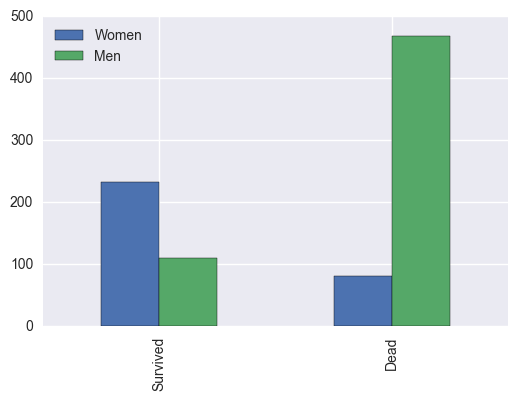

In [143]:
sur_array=[233,109] #Women, Men
dead_array=[81,468] #Women, Men
df = pd.DataFrame([sur_array,dead_array])
df.index = ['Survived','Dead']
df.columns = ['Women', 'Men']
print("df",df)
df.plot(kind='bar')

### Method 2: Using panda series (Most used)

This way we don't have to specify column names

Nor do we have to manually enter values.

df           female  male
Survived     233   109
Dead          81   468


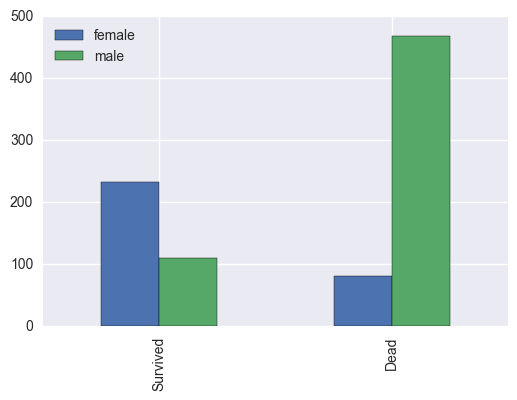

In [144]:
survived_array=sample[sample['survived']==1]['sex'].value_counts() #pandas.core.series.Series
dead_array=sample[sample['survived']==0]['sex'].value_counts()
df = pd.DataFrame([survived_array,dead_array])
df.index = ['Survived','Dead']
print("df",df)
df.plot(kind='bar')

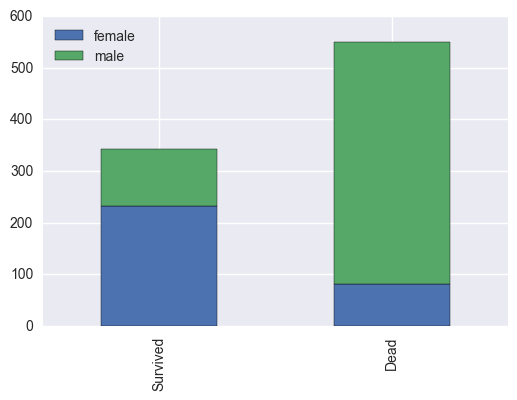

In [145]:
df.plot(kind='bar',stacked=True)

So, we see that men constitued a large amount of dead passengers, so the survival rate of men was pretty low. This is probably driven by teh fact that women were given preference on life-boats.

### 3.4 How was class related to chances of survival?

Let's now correlate the survival with the class variable.

pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower*

In [146]:
sur_array=sample[sample['survived']==1]['pclass'].value_counts()
sur_array

1    136
3    119
2     87
Name: pclass, dtype: int64

df           UpperClass  MiddleClass  LowerClass
Survived         136           87         119
Dead              80           97         372


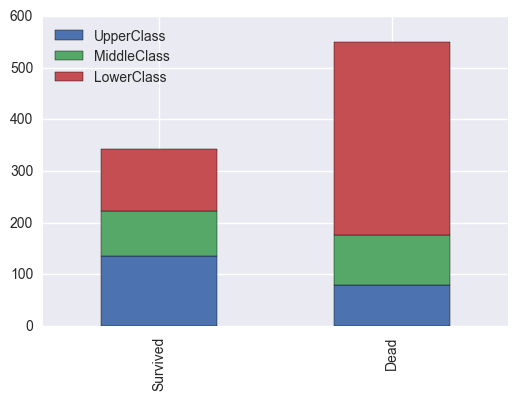

In [147]:
# 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
sur_array=sample[sample['survived']==1]['pclass'].value_counts()
dead_array=sample[sample['survived']==0]['pclass'].value_counts()
df = pd.DataFrame([sur_array,dead_array])
df.index = ['Survived','Dead']
df.columns = ['UpperClass',"MiddleClass", 'LowerClass']
print("df",df)
df.plot(kind='bar',stacked=True)

### 3.5 How was fare prices related to chances of survival?

#### Can we determine class by looking at fare prices?

We will also explore three different types of graphs: bar plots, scatter and histograms.

#### Bar plot:

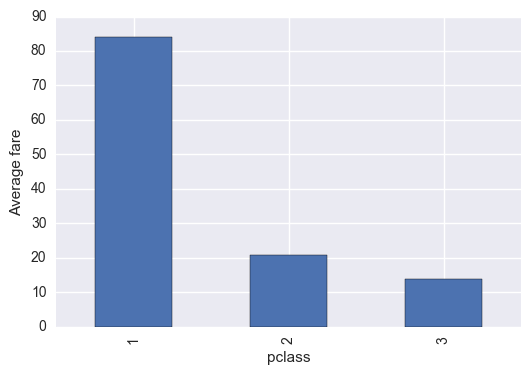

In [148]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('pclass').mean()['fare'].plot(kind='bar', ax = ax)

We see that first class fares are higher than 3rd class fares. THis is what we expected. So, to see how survival rates are realted to fare prices, we can make a scatter plot of no. of passengers survived/dead vs fares.

#### Scatter plot:

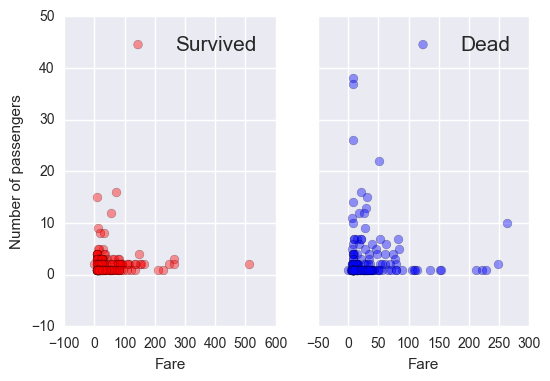

In [149]:
#plt.figure(figsize=(12,5))
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Survivors
x1 = sample[sample['survived']==1]['fare'].unique()
y1=sample[sample['survived']==1]['fare'].value_counts()
ax1.scatter(x1, y1,c='red',s=40, marker='o',alpha =0.4)
#ax1.set_title('Survivors')
ax1.set_xlabel('Fare')
ax1.set_ylabel('Number of passengers')
ax1.legend(('Survived',),scatterpoints=1,loc='upper right',fontsize=15,)


# Dead passengers
x2 = sample[sample['survived']==0]['fare'].unique()
y2=sample[sample['survived']==0]['fare'].value_counts()
ax2.scatter(x2, y2,c='blue',s=40, marker='o',alpha =0.4)
#ax2.set_title('Non-Survivors')

ax2.set_xlabel('Fare')
#ax2.set_ylabel('Number of passengers')
ax2.legend(('Dead',),scatterpoints=1,loc='upper right',fontsize=15,)

Even though we see a increased concentration of blue at the lower left side, it is difficult to interpret this scatter plot. So, using a scatter plot is **not** a good idea in this case. I am using a histogram below and immediately we see that lots of people paying small fare died. 

#### Histogram:

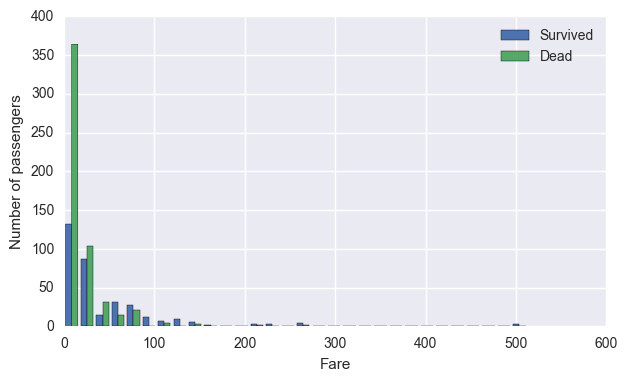

In [150]:
plt.figure(figsize=(7,4))
data=sample
plt.hist([data[data['survived']==1]['fare'],data[data['survived']==0]['fare']], 
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

This chart makes it very simple to observe that a large number of passengers with cheap tickets did not survive.

### 3.6 How was age related to chances of survival?

Let's now correlate the survival with the age variable.

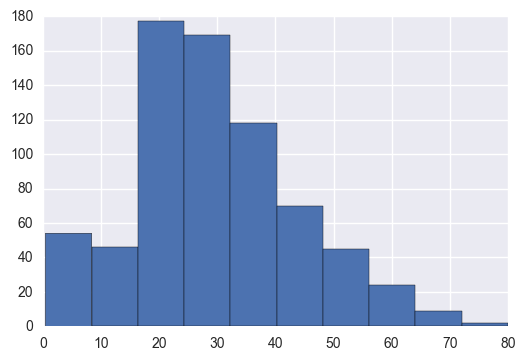

In [151]:
sample['age'].hist()

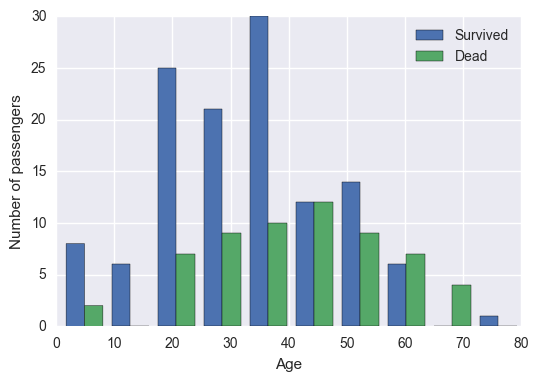

In [152]:
x=sample[sample['survived']==1].dropna()['age']
y=sample[sample['survived']==0].dropna()['age']
plt.hist([x,y], label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

It appears as if people in the age group 20-40 were more likely to have survived. This seems weird because one would expect that preference would be given to elder passengers and children on a life boat. To understand this result in detail, I deep dived into the data.

In [153]:
sample.describe()['age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: age, dtype: float64

So, we see that there are missing values! There are 177 missing values actually. 

### Handling missing values.
One solution is to replace the null values with the median age which is more robust to outliers than the mean.
```
data['Age'].fillna(data['Age'].median(), inplace=True)
```

In [154]:
print('Median {},Mean {}'.format(sample['age'].median(),sample['age'].mean()))

Median 28.0,Mean 29.69911764705882


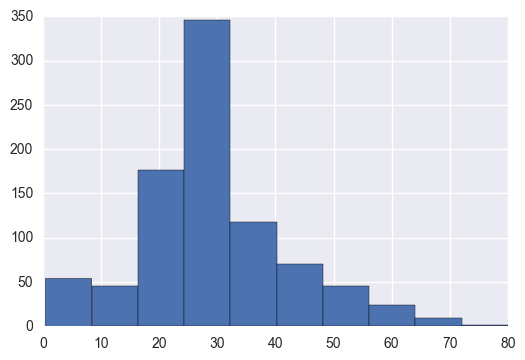

In [155]:
sample['age_fill']=sample['age']
sample['age_fill'].fillna(sample['age_fill'].median(), inplace=True)
sample['age_fill'].hist()

In [156]:
sample.describe()['age_fill']

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age_fill, dtype: float64

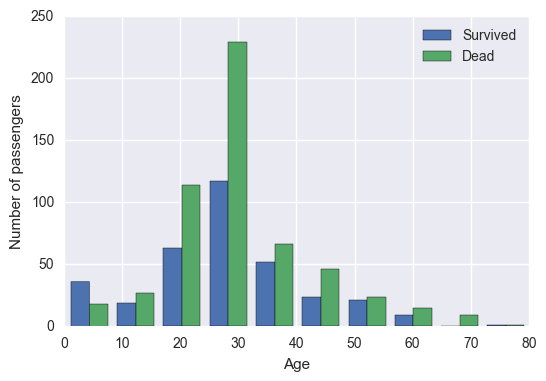

In [157]:
x=sample[sample['survived']==1]['age_fill']
y=sample[sample['survived']==0]['age_fill']
plt.hist([x,y], label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

From the chart, you notice that passengers less than 10 or older than 50 are more likely to survive. This seems to make sense - basically children and older people were given preference in loading up a life boat.

### 3.7 Correlating three variables

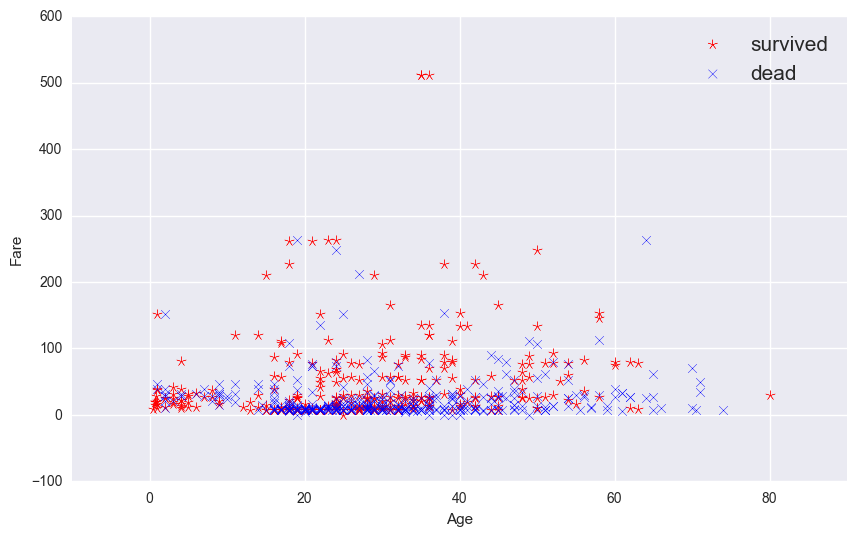

In [158]:
plt.figure(figsize=(10,6))
a = plt.subplot()
a.scatter(data[data['survived']==1]['age'],data[data['survived']==1]['fare'],c='red',s=50,marker=(5,2))
a.scatter(data[data['survived']==0]['age'],data[data['survived']==0]['fare'],c='blue',s=40, marker='x')
a.set_xlabel('Age')
a.set_ylabel('Fare')
a.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

Here we are showing how three variables: Age, Fare and survival rate is related. We can see 
* children less than 10 years of age have survived, as shown by cluster of red points
* the cluster of blue points, show that people between 20 and 40 years of age with cheap tickets, had a very low rate of survival
* passengers with fares over 100 had a much higher survival rate

### More graphs!

In [159]:
data_men=data[data['sex']=='male']
data_women= data[data['sex']=='female']

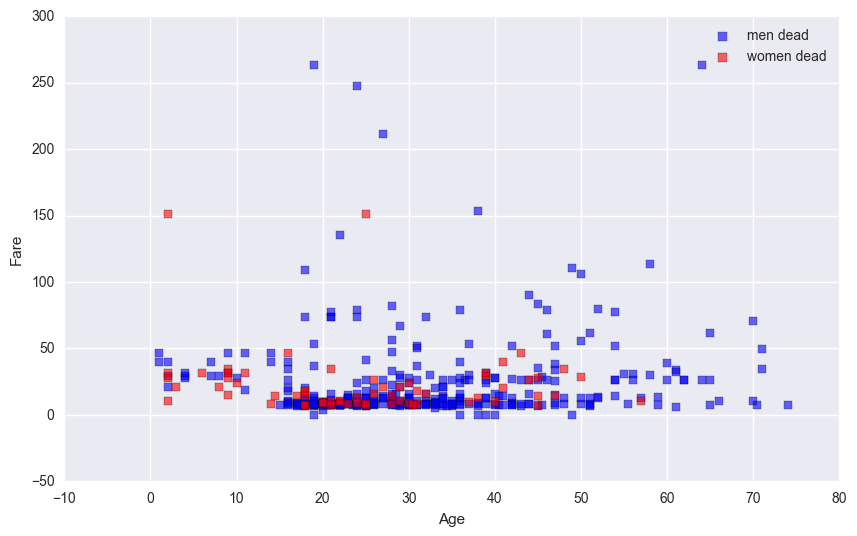

In [165]:
plt.figure(figsize=(10,6))
a = plt.subplot()
a.scatter(data_men[data_men['survived']==0]['age'],data_men[data_men['survived']==0]['fare'],\
          c='blue',s=40,alpha=0.6, marker="s")
a.scatter(data_women[data_women['survived']==0]['age'],data_women[data_women['survived']==0]['fare'],\
          c='red',s=40,alpha=0.6, marker="s")
a.set_xlabel('Age')
a.set_ylabel('Fare')
a.legend(('men dead','women dead'),loc='upper right')
#a.legend(('dead'),scatterpoints=1,loc='upper right',fontsize=15,)

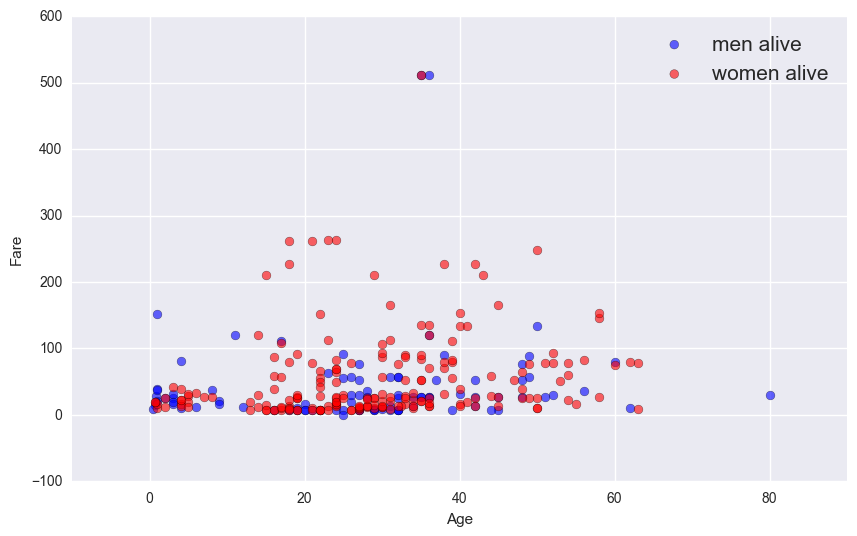

In [166]:
plt.figure(figsize=(10,6))
a = plt.subplot()
a.scatter(data_men[data_men['survived']==1]['age'],data_men[data_men['survived']==1]['fare'],\
          c='blue',s=40, alpha=0.6)
a.scatter(data_women[data_women['survived']==1]['age'],data_women[data_women['survived']==1]['fare'],\
          c='red',s=40,alpha=0.6)
a.set_xlabel('Age')
a.set_ylabel('Fare')
a.legend(('men alive','women alive'),loc='upper right',fontsize=15)

### This concludes our exploratory analysis. 

So, we see that there are lots of easy ways to take a look at the data. 

These plots confirm that one old code of conduct that sailors and captains follow in case of threatening situations: "Women and children first!". We also see how survival rates and tickets prices were related.

Once we are familiar with the data we can apply advanced techniques such as feature extraction, or prediction to it.